## Exploratory Data Analysis
It's time to explore our newly-cleaned data. For this we are going to want to break up our exploration into continuous vs categorical variables. Continuous here simply refers to all numeric data at this point, since those also include discrete and ordinal, which we want in our exploration.

In [1]:
# import our libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# some matplotlib params to make the defaults a bit more readable
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

### Load our data

In [3]:
df = pd.read_csv('./datasets/train_train_clean.csv')
# pandas reads in our ID and PID columns as int64 automatically, 
# so let's change them to str to separate them from our numerical variables.
# we also want to change MS SubClass and Mo Sold to nominal variables.
for col in ['Id','PID','MS SubClass','Mo Sold']:
    df[col] = df[col].astype(str)

In [4]:
# check that nothing is out of place
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1536 non-null   object 
 1   PID              1536 non-null   object 
 2   MS SubClass      1536 non-null   object 
 3   MS Zoning        1536 non-null   object 
 4   Lot Frontage     1536 non-null   float64
 5   Lot Area         1536 non-null   int64  
 6   Street           1536 non-null   object 
 7   Lot Shape        1536 non-null   int64  
 8   Land Contour     1536 non-null   object 
 9   Utilities        1536 non-null   int64  
 10  Lot Config       1536 non-null   object 
 11  Land Slope       1536 non-null   int64  
 12  Neighborhood     1536 non-null   object 
 13  Condition 1      1536 non-null   object 
 14  Condition 2      1536 non-null   object 
 15  Bldg Type        1536 non-null   object 
 16  House Style      1536 non-null   object 
 17  Overall Qual  

## Continuous variable exploration
We'll employ the use of scatterplots, pairplots, and heatmaps to reason about our data. We're looking out for potentially strong correlations between our continuous variables and SalePrice that might signal a good predictor.

In [5]:
# look at some summary statistics of our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,1536.0,69.312826,21.020936,21.0,60.00,70.0,80.00,313.0
Lot Area,1536.0,10011.149740,5409.502223,1470.0,7475.00,9490.0,11532.75,70761.0
Lot Shape,1536.0,2.591797,0.566754,0.0,2.00,3.0,3.00,3.0
Utilities,1536.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
Land Slope,1536.0,1.944661,0.247852,0.0,2.00,2.0,2.00,2.0
Overall Qual,1536.0,6.098307,1.435736,1.0,5.00,6.0,7.00,10.0
Overall Cond,1536.0,5.571615,1.121923,1.0,5.00,5.0,6.00,9.0
Year Built,1536.0,1971.184245,30.417581,1872.0,1953.00,1974.0,2001.00,2010.0
Year Remod/Add,1536.0,1984.159505,20.964153,1950.0,1965.00,1993.0,2004.00,2010.0
Mas Vnr Area,1536.0,94.134766,169.600890,0.0,0.00,0.0,146.50,1600.0


It's not so easy to get a proper sense of our data just by looking at our summary table, but we already get a sense that many of our variables are heavily skewed. Looking at histograms will make visualizing these summaries a bit easier.

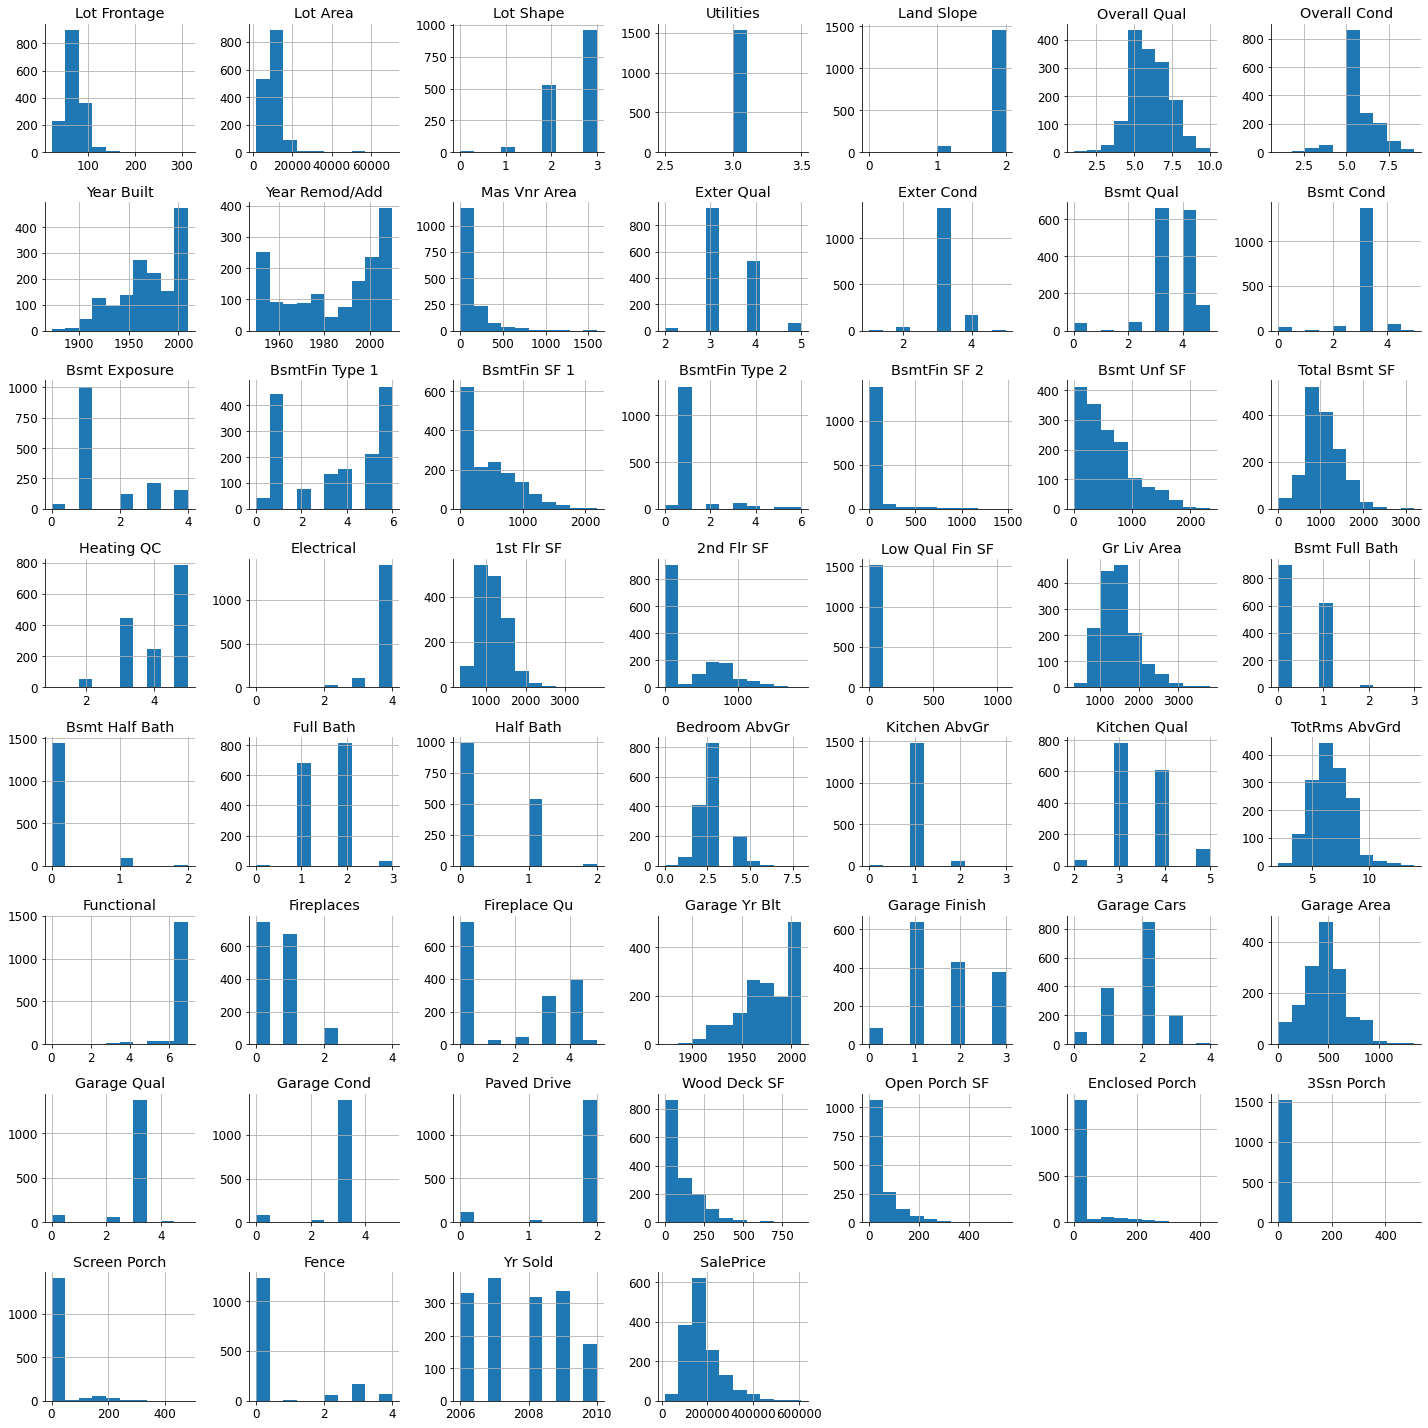

In [6]:
X_cont = df._get_numeric_data()
X_cont.hist(figsize = (20,20))
plt.tight_layout();

Many of our variables appear to have quite severe right skews. Lot area for example seems to have some very extreme values. This is to be expected, as our variables are hard bounded at 0 on the bottom end, while their upper bound is theoretically infinite. Some of our ordinal variables are showing a large proportion of values belonging to one rank. These may not prove very predictive later on. Let's remove these from consideration first; we can always drop them later. We use a threshold of 90% of values belonging to one category to decide which to set aside, but also our discretion as to whether they may still prove useful.

We should not be overly worried about the skews for now, as linear regression makes no assumptions about the distribution of the underlying variables, only that of the residuals. We will cover these assumptions later during our modelling stage.

We remove:
- Utilities (in our training set we only have 1 value for utilities!)
- Bsmt Half Bath (it is more common for basements to have full baths. there are only a handful of houses that have half baths)
- Kitchen AbvGr (most houses only have 1 kitchen)
- Functional

Special mention - continuous variables that we should set aside:
- Low Qual Fin SF. There are 2016 houses with 0 sq ft of low quality finish. This is quite useless so we set aside.
- 3Ssn Porch. The many values of 0 show that most people don't have a 3 season porch.

In [7]:
removed_cols = ['Utilities','Bsmt Half Bath','Kitchen AbvGr','Functional','Low Qual Fin SF','3Ssn Porch']

### Scatterplots
Now let's look at some scatterplots to visualize our remaining continuous variables' relationship to SalePrice

In [8]:
def subplot_scatter(pred_vars, target_var = 'SalePrice', df=df):
    """
    target_var: target variable of choice. pass as a string.
    pred_vars: predictor variables of choice. pass in as a list.
    df: dataframe the variables come from.
    """
    ncols = 4
    nrows = math.ceil(len(pred_vars)/4)
    fig, ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = (15, 3 * nrows))
    ax = ax.ravel()
    for n, var in enumerate(pred_vars):
        g = sns.regplot(data=df, 
                        x=var, 
                        y=target_var, 
                        ci=False,
                        scatter_kws={'alpha':0.3},
                        ax = ax[n],
                        line_kws = {'color':'red'})
        g.set_xlabel(None)
        g.set_title(var)
    plt.tight_layout()

In [9]:
# our target
y = df['SalePrice']
# our continuous variables
X_cont = df._get_numeric_data().drop(columns = ['SalePrice'])

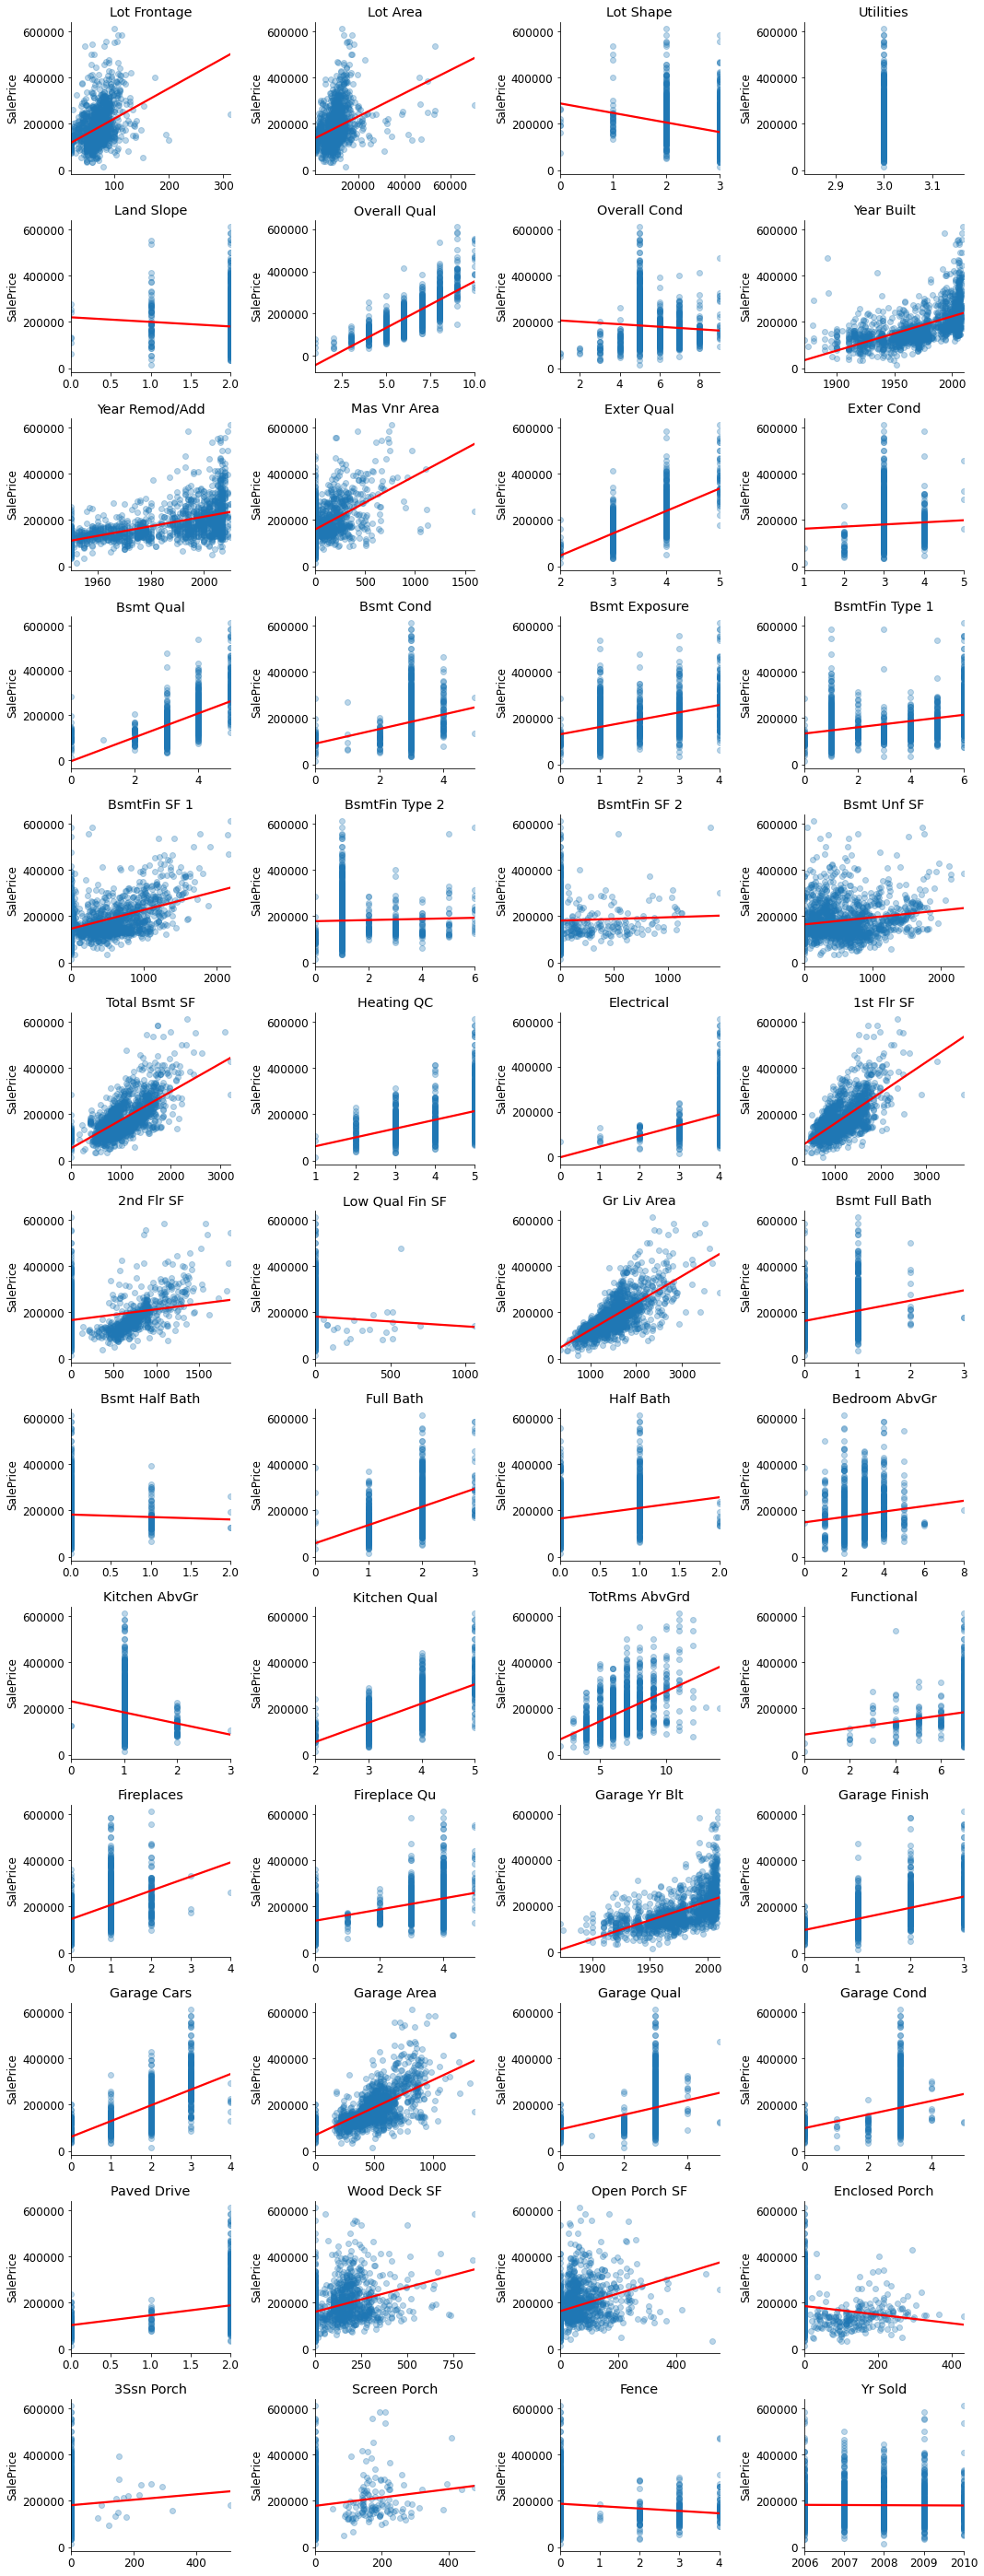

In [10]:
subplot_scatter(X_cont.columns);

A few variables immediately stand out as displaying decent correlation with SalePrice. Overall Qual, Year Built, and some of the square footage related variables like Gr Liv Area and Total Bsmt SF are some of these.
***
Let's also do a heatmap for these variables to visualize their correlation with SalePrice. This will complement the observations we got from our scatterplots.

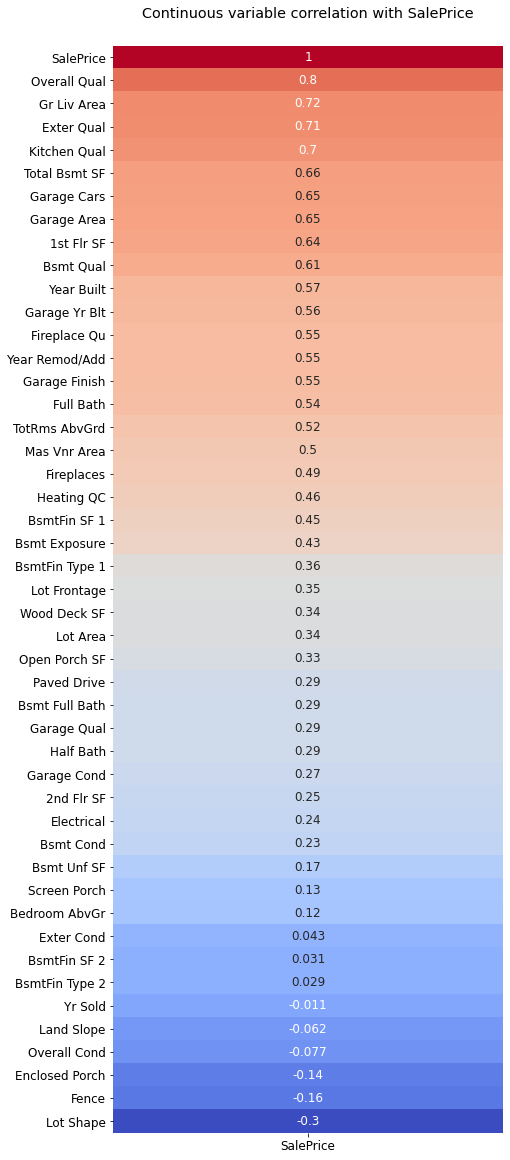

In [11]:
fig, ax = plt.subplots(figsize=(7,20))
g = sns.heatmap(df._get_numeric_data().drop(columns = removed_cols).corr()[['SalePrice']]\
                            .sort_values(by='SalePrice', ascending=False), 
                            annot=True, cmap='coolwarm', ax=ax, cbar=False)
g.set_title('Continuous variable correlation with SalePrice', y=1.02);

Like above, we note that square footage related variables seem to correlate well with SalePrice. Because these variables are likely multicollinear, we will need to take special care in choosing which variables to use, or perhaps to feature engineer a variable that unifies square footage related variables. It should be noted though, that multicollinearity does not affect a model's predictive power, but will of course reduce our ability infer an individual predictor's effect on SalePrice. This means that ultimately we may still end up with a decently predictive model.

Interestingly, Lot shape has the most negative correlation with SalePrice, suggesting that regularly shaped lots are somehow less valuable than irregularly shaped lots.
***
Now that we know that some variables are more interesting than others, let's look at pairplots between groups of variables. This will help us identify pairs of variables that are highly correlated.

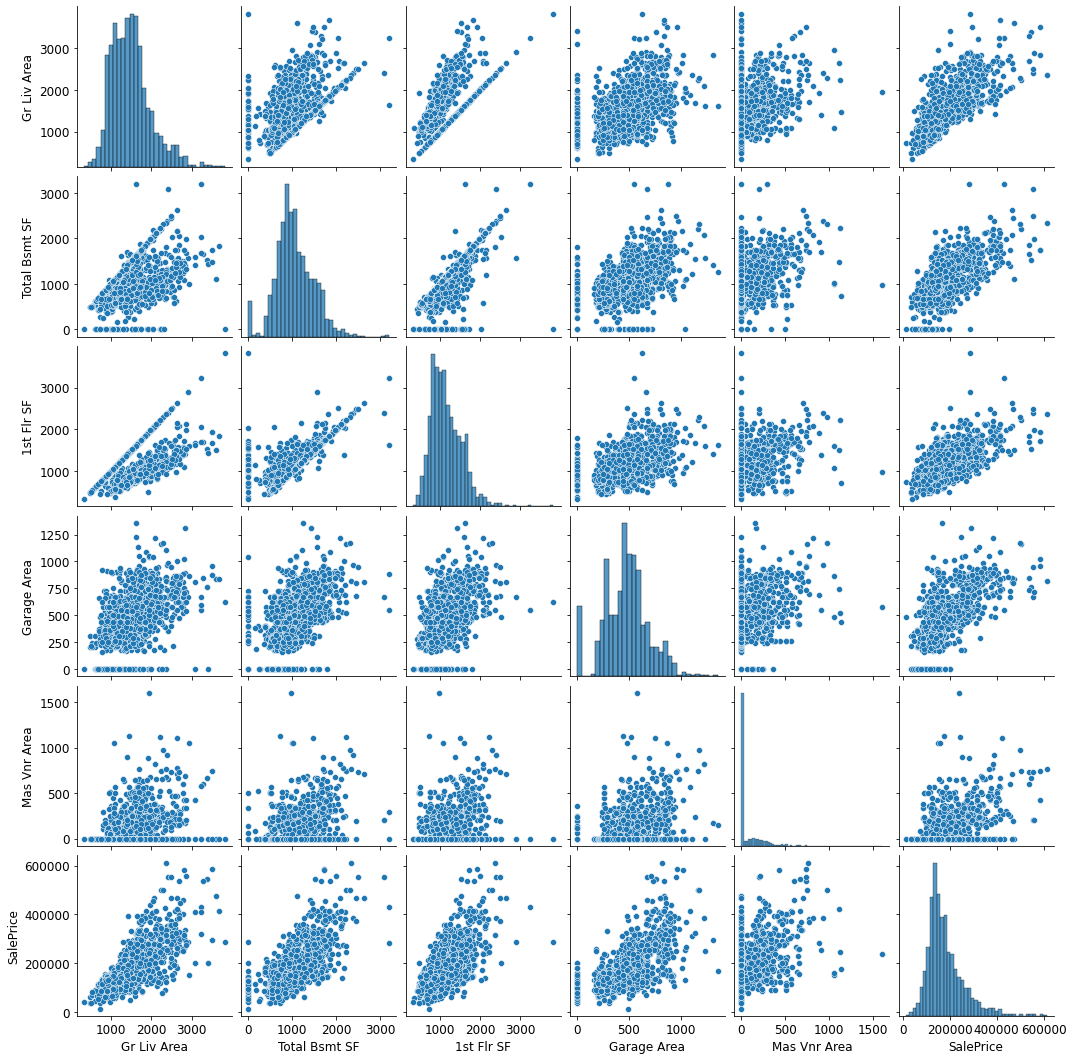

In [12]:
# square foot related columns
all_cont_SF = ['Gr Liv Area','Total Bsmt SF','1st Flr SF','Garage Area','Mas Vnr Area','SalePrice']
sns.pairplot(data = df[all_cont_SF]);

In [13]:
df[all_cont_SF].corr()

,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Mas Vnr Area,SalePrice
Gr Liv Area,1.000000,0.400597,0.532103,0.471261,0.337099,0.717142
Total Bsmt SF,0.400597,1.000000,0.784689,0.480050,0.367553,0.658462
1st Flr SF,0.532103,0.784689,1.000000,0.490058,0.345033,0.639776
Garage Area,0.471261,0.480050,0.490058,1.000000,0.360966,0.647849
Mas Vnr Area,0.337099,0.367553,0.345033,0.360966,1.000000,0.496153
SalePrice,0.717142,0.658462,0.639776,0.647849,0.496153,1.000000


As we saw earlier, sq ft related columns have decent correlation with SalePrice. But they also have moderate to high correlation with each other. For e.g. Total Bsmt SF is very correlated with 1st Flr SF. Nonetheless, this gives us a good sense of what a good class of predictors might be later on.

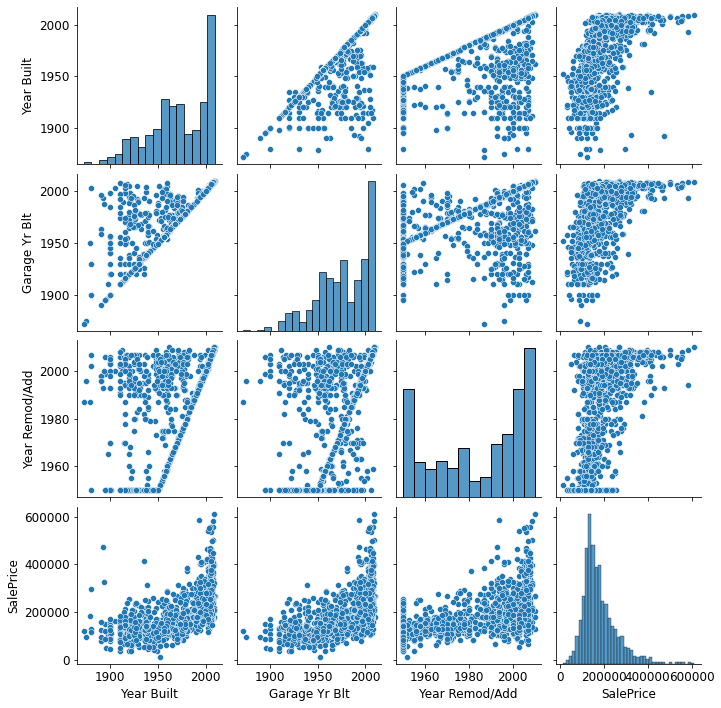

In [14]:
# year related columns
sns.pairplot(data=df[['Year Built','Garage Yr Blt','Year Remod/Add','SalePrice']]);

In [15]:
df[['Year Built','Garage Yr Blt','Year Remod/Add','SalePrice']].corr()

,Year Built,Garage Yr Blt,Year Remod/Add,SalePrice
Year Built,1.000000,0.859175,0.611426,0.570446
Garage Yr Blt,0.859175,1.000000,0.633458,0.562473
Year Remod/Add,0.611426,0.633458,1.000000,0.549506
SalePrice,0.570446,0.562473,0.549506,1.000000


These variables also show high correlation with each other, which is to be expected, as we know that Garages cant be built before a house. We note the bimodal distribution for Year Remod/Add, as well as the lower bound year value of 1950. As the data dictionary tell us that this variable's default value is equal to Year Built if the unhouse is not remodeled, we surmise that it's likely data collection for this variable only started in 1950, otherwise the values should have been set to the Year Built.

While the relationship between these variables and SalePrice look qute linear from the beginning till around year 2000, we note that from 2000 onwards there is a siginifcant sudden increase in our slope. It is almost as if there is one linear relationship describing year and price from 1880 to 2000, and another linear relationship from 2000 onwards.

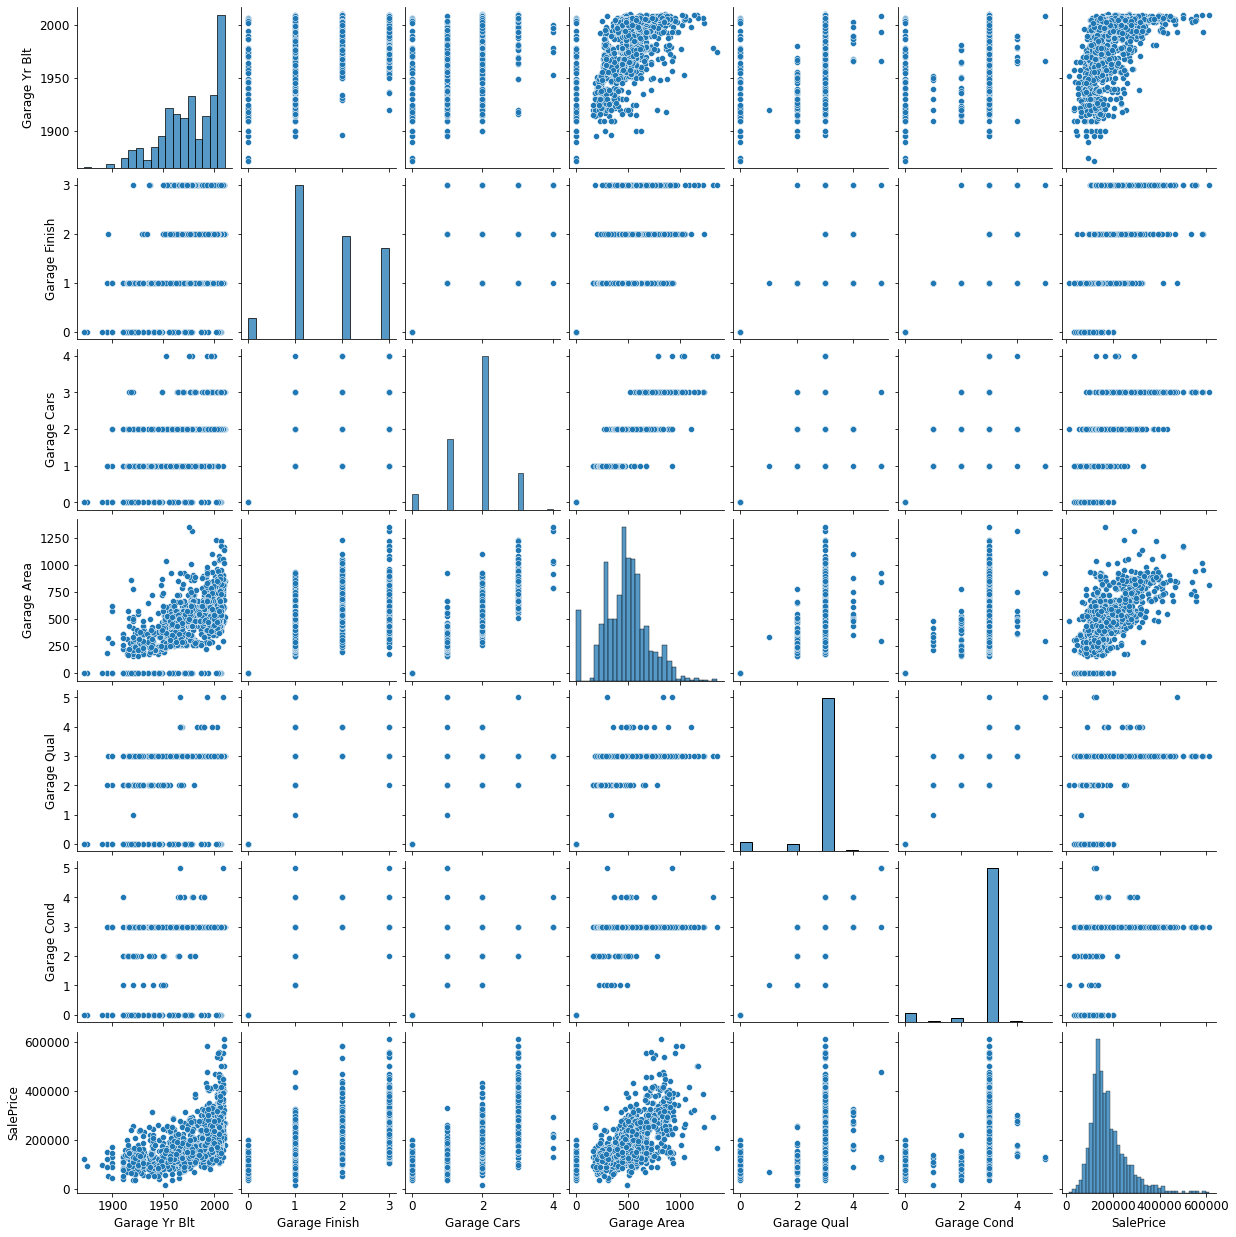

In [16]:
# garage related columns
all_cont_gar = list(df.columns[df.columns.str.contains('Garage') & ~df.columns.str.contains('Type')]) + ['SalePrice']
sns.pairplot(data=df[all_cont_gar]);

In [17]:
df[all_cont_gar].corr()

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,SalePrice
Garage Yr Blt,1.000000,0.570372,0.633227,0.614395,0.409957,0.374146,0.562473
Garage Finish,0.570372,1.000000,0.577505,0.511874,0.488305,0.482359,0.548531
Garage Cars,0.633227,0.577505,1.000000,0.901787,0.580790,0.561033,0.653295
Garage Area,0.614395,0.511874,0.901787,1.000000,0.566589,0.545104,0.647849
Garage Qual,0.409957,0.488305,0.580790,0.566589,1.000000,0.947078,0.289971
Garage Cond,0.374146,0.482359,0.561033,0.545104,0.947078,1.000000,0.269193
SalePrice,0.562473,0.548531,0.653295,0.647849,0.289971,0.269193,1.000000


It is a bit harder to see correlations in the pairplots as many of these variables are ordinal, but we note generally these variables are moderately correlated. Relative to some of the relationships we saw between SalePrice and square footage/year variables, the garage variables seem to be more varied in their correlation with SalePrice. The 2 variables best correlated with price are Cars and Area, which themselves are the most correlated Garage variables. In comparison, Garage quality and condition are poorly correlated with SalePrice. This suggests that what people care about is the functional size of a garage more than it's looks or liveability, which makes sense. Garages are for parking cars or doing DIY work, not for sleeping.

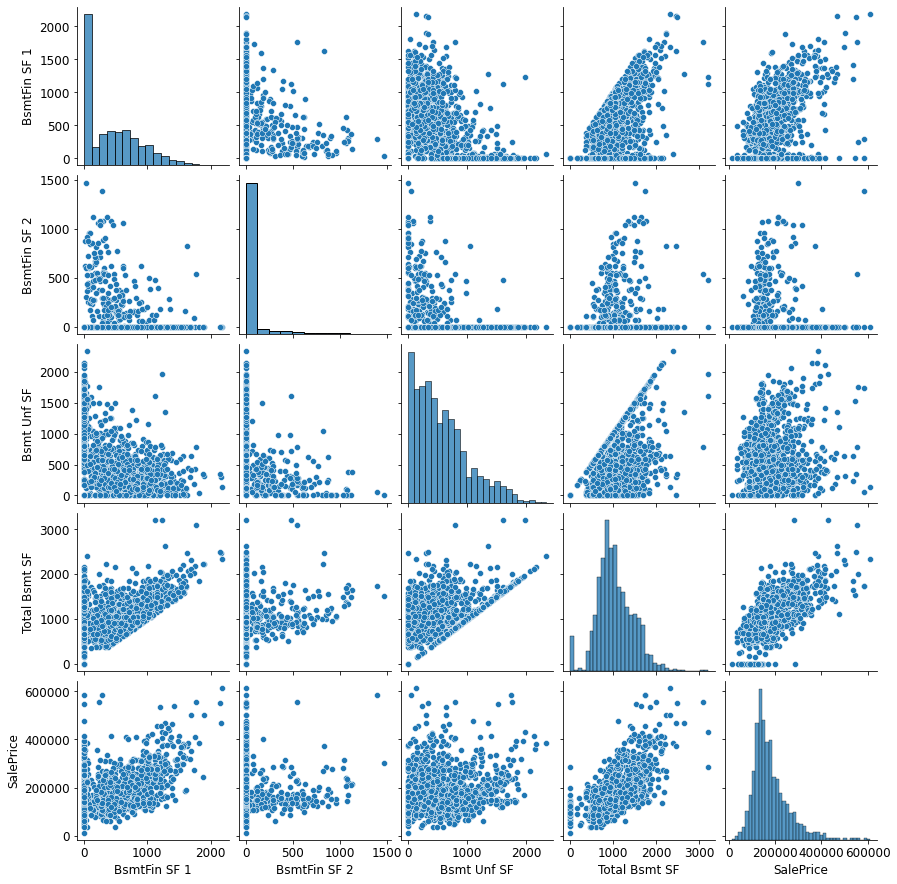

In [18]:
# basement related variables
all_cont_bsmt = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','SalePrice']
sns.pairplot(data=df[all_cont_bsmt]);

In [19]:
df[all_cont_bsmt].corr()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,SalePrice
BsmtFin SF 1,1.000000,-0.047715,-0.505038,0.486786,0.452504
BsmtFin SF 2,-0.047715,1.000000,-0.227125,0.112165,0.031368
Bsmt Unf SF,-0.505038,-0.227125,1.000000,0.432540,0.170505
Total Bsmt SF,0.486786,0.112165,0.432540,1.000000,0.658462
SalePrice,0.452504,0.031368,0.170505,0.658462,1.000000


We see that BsmtFin SF 2 has a very low correlation to SalePrice. This is likely because most people do not have 2 basements in the first place, as we can see from the pairplot. Bsmt Unf SF is also quite poorly correlated with SalePrice. I hypothesize that this is because the unfinished SF by itself tells us little about the basement in general. A 100 sqft basement with 50sqft unfinished (50% unf) is proportionally more unfinished than a 500sqft basement with 100sqft unfinished (20%). I'll create a new variable called Bsmt Unf_prop that measures the proportion of unfinished square footage in a basement.

In [20]:
df['Bsmt Unf_prop'] = df['Bsmt Unf SF'] / df['Total Bsmt SF']
# there will probably be some nulls because for houses with no basements, 0/0 is not possible. we impute 0 into this instead.
df['Bsmt Unf_prop'].fillna(0, inplace=True)

In [21]:
df[['Bsmt Unf_prop', 'SalePrice']].corr()

,Bsmt Unf_prop,SalePrice
Bsmt Unf_prop,1.000000,-0.119322
SalePrice,-0.119322,1.000000


While this appears to still have a weak correlation, at least now we can see that as the proportion of unfinished basement goes up, the SalePrice also goes down. Whereas previously, as unfinished SF increased, SalePrice also increased, which is a bit counter intuitive.
***
One final group of variables I'd like to examine are the quality related variables. We notice that in our heatmap above, our quality related variables seem to correlate quite well with SalePrice. As this are all ordinal variables, pairplots won't show us much, so let's just use a heatmap instead.

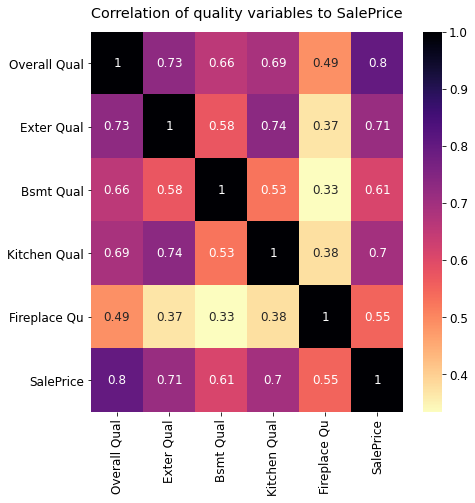

In [22]:
high_qual = ['Overall Qual', 'Exter Qual', 'Bsmt Qual','Kitchen Qual', 'Fireplace Qu','SalePrice']
fig, ax = plt.subplots(figsize=(7,7))
g = sns.heatmap(data=df[high_qual].corr(), annot=True, cmap='magma_r')
g.set_title('Correlation of quality variables to SalePrice', y=1.02);

It appears that our quality related variables themselves are also quite correlated, with the exception of Fireplace Qu, which is quite poorly correlated with the other quality variables. This suggests that Fireplace Qu might affect SalePrice in different ways than the other variables. It might be possible that Fireplace Qu matters more to SalePrice when the number of fireplaces in a house increases. Obviously, a house with no fireplace will not see its SalePrice affected by Fireplace Qu, but if I'm a buyer looking for a house with 2 fireplaces, I would care more about their quality. Let's create an interaction term and see what happens.

In [23]:
df['Fireplace * Qu'] = df['Fireplaces'] * df['Fireplace Qu']
df[['Fireplace * Qu','Fireplaces','Fireplace Qu','SalePrice']].corr()

,Fireplace * Qu,Fireplaces,Fireplace Qu,SalePrice
Fireplace * Qu,1.000000,0.960668,0.913630,0.532866
Fireplaces,0.960668,1.000000,0.864605,0.486506
Fireplace Qu,0.913630,0.864605,1.000000,0.550830
SalePrice,0.532866,0.486506,0.550830,1.000000


Disappointingly, ithere does not seem to be a significant interaction here. Fireplace Qu on its does a better job predicting SalePrice. Let's try creating one last interaction term before we finish this section. 

I hypothesize that while Gr Liv Area is already important in predicting SalePrice, its importance might also be dependent on the age of the house. To give a local example, if I'm on the market specifically for a new, 99yr HDB flat, more spacious flats would be to come by as BTOs are quite small nowadays. As such, I might be willing to pay an extra premium for each sqft of extra space. However, older HDB flats were typically bigger than current new BTOs. So even if I'm looking for an older HDB that has more space, I might not be as willing to pay that extra premium for the space, as I could easily find old HDB flats with more space, like the old mansionettes. In other words, the Price per Sqft (PSF) I'm willing to pay could depend on the age of the house.

In [24]:
df['Year Built * Gr Liv Area'] = df['Year Built'] * df['Gr Liv Area']
df[['Year Built','Gr Liv Area','Year Built * Gr Liv Area','SalePrice']].corr()

,Year Built,Gr Liv Area,Year Built * Gr Liv Area,SalePrice
Year Built,1.000000,0.237710,0.284415,0.570446
Gr Liv Area,0.237710,1.000000,0.998698,0.717142
Year Built * Gr Liv Area,0.284415,0.998698,1.000000,0.738471
SalePrice,0.570446,0.717142,0.738471,1.000000


Wow! We see that when interacting both variables, the interaction term has a stronger correlation to SalePrice than the individual variables. This *potentially* lends support to my theory PSF could be moderated by the age of a house. I suspect that this will turn out to be a useful predictor later.

### Categorical variable exploration
Let's make boxplots of our categorical variables. At the same time, we make countplots to visualize the distribution of categories within each variable. If we see for example, that a variable has a lot of values in one category, but very very few in others, there may not be enough variation within that feature to give us strong predictive power.

In [25]:
# group our categorical data together
X_cont = df._get_numeric_data()
X_cat = df.drop(columns = (list(X_cont.columns)+['PID','Id','SalePrice']))

In [26]:
def count_and_box(predictor_vars, target_var='SalePrice', df=df):
    ncols = 2
    nrows = math.ceil(len(predictor_vars))
    fig, ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = (15, 4 * nrows))
    for n, var in enumerate(predictor_vars):
        
        g = sns.boxplot(data=df, x=var, y=target_var, ax=ax[n,0])
        h = sns.countplot(data=df, x=var, ax=ax[n,1])
        g.set_title(var), g.set_xlabel(None)
        h.set_title(var), h.set_xlabel(None)
        if var == 'Neighborhood' or var == 'Exterior 1st' or var == 'Exterior 2nd':
            g.tick_params(axis='x', labelrotation=90)
            h.tick_params(axis='x', labelrotation=90)
            
    plt.tight_layout()

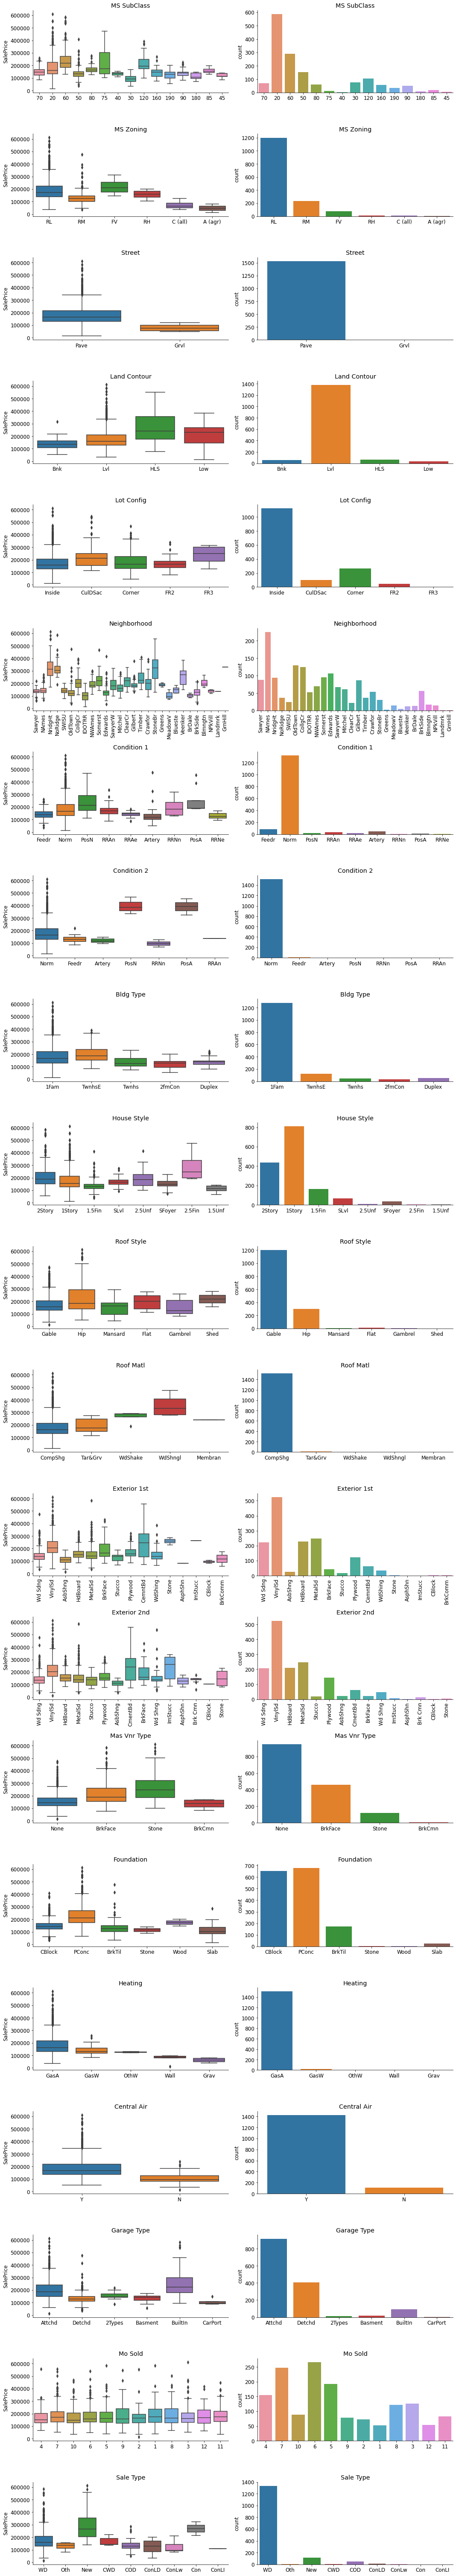

In [27]:
count_and_box(X_cat.columns);

Many of these variables have categories with significant right skew. For e.g., MS Zoning and SubClass have categories which show many outliers towards the upper end. This makes sense as SalePrice is theoretically unbounded on the upper end, but is bounded by a hard 0 on the bottom end. We are mostly interested in variables that show variations in SalePrice across categories. The Neighborhood variable shows that certain neighborhoods tend to command a higher price than others, for example. Another potentially useful variable is Mas Vnr Type. There 'appears' to be some increase in the median price as the masonry veneer changes from None to BrkFace to Stone.

On the other hand, we notice that many of these variables have one category within them that contain a significant majority of values, for example Heating. Because of this, this variable cannot really help us to differentiate SalePrices between categories. The variable functions almost like a constant. Based on our countplots, let's set aside these values from consideration.

We remove:
- Street
- Heating
- Condition 2
- Roof Matl

In [28]:
# add the above 4 variables to our list of variables to remove from consideration
removed_cols = removed_cols + ['Street','Heating','Condition 2','Roof Matl']

In [29]:
# create an intermediate table with the above variables removed.
# this way, we retain the variables in our original dataframe if we need to access them again.
df_useful_vars = df.drop(columns = removed_cols).copy()
df_useful_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1536 non-null   object 
 1   PID                       1536 non-null   object 
 2   MS SubClass               1536 non-null   object 
 3   MS Zoning                 1536 non-null   object 
 4   Lot Frontage              1536 non-null   float64
 5   Lot Area                  1536 non-null   int64  
 6   Lot Shape                 1536 non-null   int64  
 7   Land Contour              1536 non-null   object 
 8   Lot Config                1536 non-null   object 
 9   Land Slope                1536 non-null   int64  
 10  Neighborhood              1536 non-null   object 
 11  Condition 1               1536 non-null   object 
 12  Bldg Type                 1536 non-null   object 
 13  House Style               1536 non-null   object 
 14  Overall 

### One-hot encoding of nominal variables
Now that we've explored our data visually, let's one-hot encode our nominal variables so we can begin preparing for our model.

In [30]:
# extract the categorical variables that we want to one hot encode
cat_vars = df_useful_vars.select_dtypes('object').drop(columns = ['PID','Id']).columns

In [31]:
# here we put dummy_na=True because we want to catch the null values for Garage Type.
df_dummied = pd.get_dummies(df_useful_vars, columns = cat_vars, dummy_na=True, prefix=cat_vars)

In [32]:
# we actually don't need the dummy nan columns except for garage type, so let's remove those from df_dummied
dummy_nan_cols = df_dummied.columns[df_dummied.columns.str.contains('nan') \
                                    & ~df_dummied.columns.str.contains('Garage')]
df_dummied.drop(columns = dummy_nan_cols, inplace=True)

#### Now that all our predictor columns are numerical, let's take another look at the heatmap of correlations with SalePrice

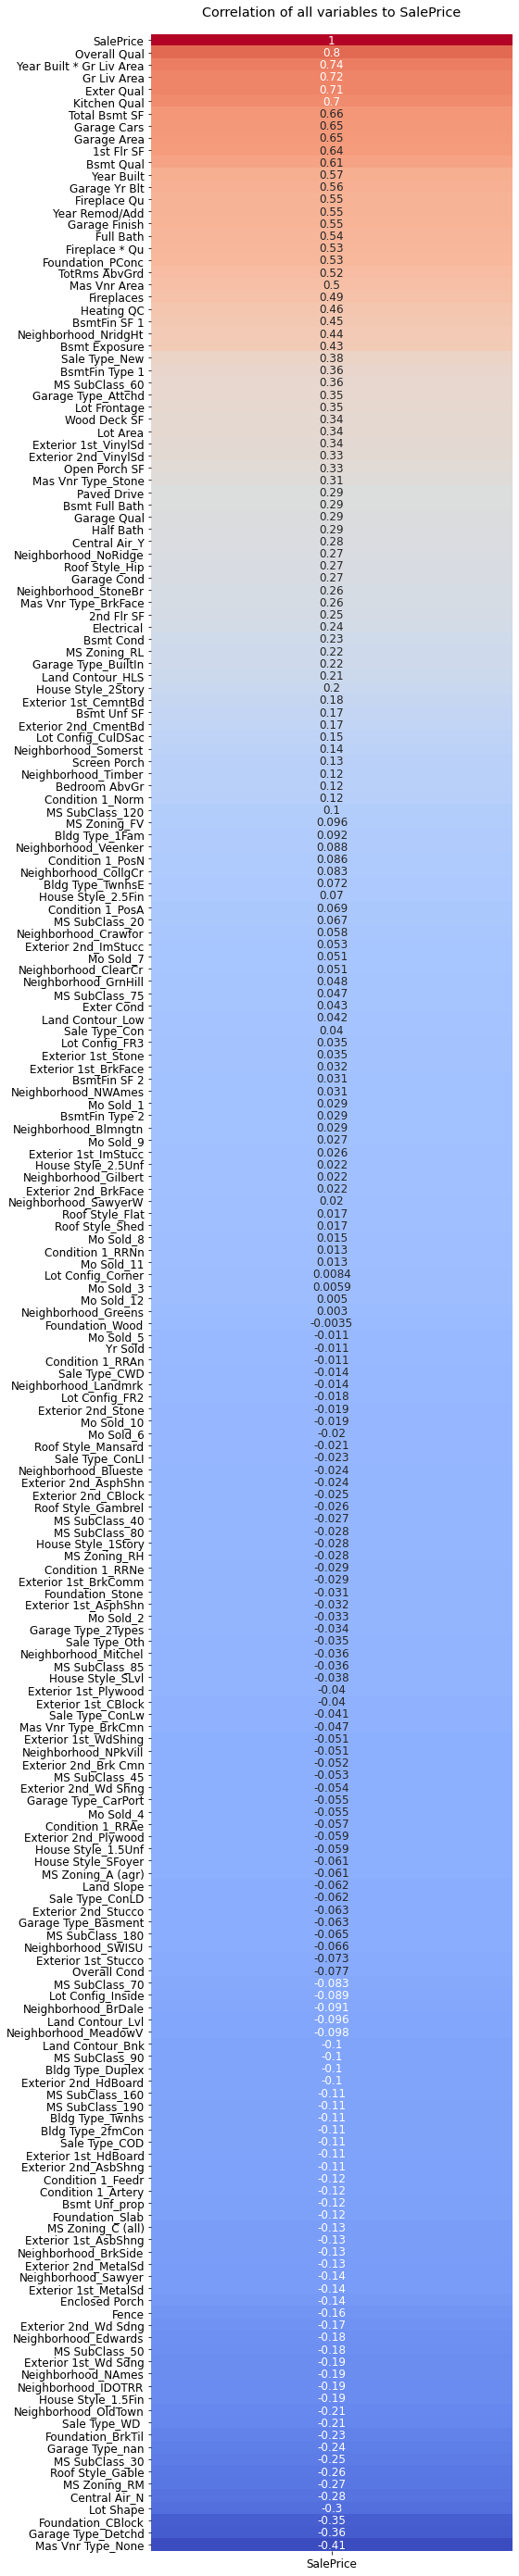

In [33]:
# let's look at a heatmap of ALL variables against SalePrice
fig, ax = plt.subplots(figsize=(7,50))
g = sns.heatmap(df_dummied.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
                annot=True, cmap='coolwarm', ax=ax, cbar=False)
g.set_title('Correlation of all variables to SalePrice', y=1.005);

While our top positively correlated variables still remain the same, we note that there are some notable dummy variables now that show stronger negative correlation than our previous most negatively correlated variable, Lot Shape. Some dummy variables now also show moderate correlation with SalePrice, for example Foundation_PConc and Neighborhood_NridgHt. While it is hard to tease out now what variables will end up being useful, we thankfully can leave that job to the Lasso Regression when we begin our model exploration and iteration.

In [34]:
# save df_dummied.
df_dummied.to_csv('./datasets/tt_clean_dummy.csv', index=False)

## Apply preprocessing steps to val and test set
We can't forget to apply the transformations we did - feature engineering, one-hot enconding - in this notebook to our validation and test sets.

**!!!ATTENTION!!!**

Because we have already split our data into train and val sets before this, our nominal variables run the risk of not containing the full set of possible values in our train or val set. Imagine that at the start we have a nominal variable 'Animal' with 10 categories in it, but one of these categories, 'Rhino', contains very few values, for instance only 2. At the point when we split our data, those 2 Rhino values might end up in our train set, which means our val set **WON'T** contain any values for Rhino. When we dummy encode our val set, we will **NOT** get back an 'Animal_Rhino' dummy column. This then means only our train set has the Animal_Rhino column while our val set does not. This could also happen the other way, if very rare values only end up in our val set but not our train set. If we were to fit our models on our train set, they would not be able to predict any scores on our val set as the val set contains *different* columns than our train set now.

As such, knowing that we are training our model on our train set, we want to ensure that the val set only contains columns present in our train set. This means we *add* columns only in our train set to our val set, and *remove* columns that are only in our val set but not our train set. When adding columns to our val set, we simply impute 0 for all the values, as our val set obviously contains NO values from those columns.

In [35]:
# create a function that unifies our preprocessing steps so far
def cleaning(df):
    for col in ['Id','PID','MS SubClass','Mo Sold']:
        df[col] = df[col].astype(str)
    df['Bsmt Unf_prop'] = df['Bsmt Unf SF'] / df['Total Bsmt SF']
    df['Bsmt Unf_prop'].fillna(0, inplace=True)
    df['Fireplace * Qu'] = df['Fireplaces'] * df['Fireplace Qu']
    df['Year Built * Gr Liv Area'] = df['Year Built'] * df['Gr Liv Area']
    df_useful_vars = df.drop(columns = removed_cols).copy()
    df_dummied = pd.get_dummies(df_useful_vars, columns = cat_vars, dummy_na=True, prefix=cat_vars)
    df_dummied.drop(columns = dummy_nan_cols, inplace=True)
    return df_dummied

In [36]:
# read in our validation set
val = pd.read_csv('./datasets/train_val_clean.csv')
# clean it
val_dummied = cleaning(val)

In [37]:
# these are columns in our TRAIN set that are not found in our VAL set
set(df_dummied).difference(set(val_dummied))

{'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Exterior 1st_AsphShn',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Foundation_Wood',
 'MS Zoning_A (agr)',
 'Neighborhood_Landmrk',
 'Sale Type_ConLw',
 'Sale Type_Oth'}

In [38]:
# we ADD these columns to the val set.
val_dummied[list(set(df_dummied).difference(set(val_dummied)))] = 0

In [39]:
# these are columns in our VAL set that are not found in our TRAIN set
set(val_dummied).difference(set(df_dummied))

{'MS SubClass_150', 'MS Zoning_I (all)'}

In [40]:
# we REMOVE these columns from the val set
val_dummied.drop(columns = set(val_dummied).difference(set(df_dummied)), inplace=True)

In [41]:
# do a final check that our sets contain the EXACT SAME COLUMNS
# we can check the union of our 2 sets' columns to see if it is the same number of columns as our train set
len(set(val_dummied.columns).union(set(df_dummied.columns))) == len(df_dummied.columns)

True

#### Now we repeat the same thing for our test set

In [42]:
test = pd.read_csv('./datasets/test_clean.csv')
test_dummied = cleaning(test)
# add and remove columns as necessary based on set differences
test_dummied[list(set(df_dummied).difference(set(test_dummied)))] = 0   
test_dummied.drop(columns = set(test_dummied).difference(set(df_dummied)), inplace=True)

In [43]:
# check that train set columns = test set columns
len(set(val_dummied.columns).union(set(df_dummied.columns))) == len(df_dummied.columns)

True

## Scaling
As a final step before our modeling, we want to scale our data as we will be using Ridge, Lasso, and ElasticNet models. Any model that performs regularization requires the data to be standardized otherwise the regularization will unfairly penalize certain variables based on their scale.

In [44]:
# create a function that scales ONLY our continuous variables. we want to leave our binary variables alone.
def custom_scaler(df, fit=False):
    y = df['SalePrice'].copy() # extract SalePrice as we don't want to scale it
    # separate categorical and continuous variables
    df_cat = df[df.columns[df.columns.str.contains('_')]].drop(columns='Bsmt Unf_prop')
    df_cont = df.drop(columns = df_cat.columns).drop(columns=['SalePrice','PID','Id']) # <--- we don't need these columns anymore

    # create our scaler
    if fit: # <------------ this is to be set to True the FIRST time we run this function on our train set
        global ss
        ss = StandardScaler()
        df_cont_scaled = ss.fit_transform(df_cont)  # <---- fit our Scaler on our training set
    else: # <----- after our first run, our Scaler is already fit, so let fit==False and we will go straight to transform.
        df_cont_scaled = ss.transform(df_cont) 

    # put this scaled data back into a dataframe
    df_cont_scaled_df = pd.DataFrame(df_cont_scaled, columns = df_cont.columns)

    # concat this scaled table with our cat variables and SalePrice and save it back as our X_scaled.
    X_scaled = pd.concat([df_cont_scaled_df, df_cat, y], axis=1)
    return X_scaled

In [45]:
# scale all 3 sets - training, validation, and test
df_dummied_scaled = custom_scaler(df_dummied, fit=True) # set fit=True to fit our scaler to our training data
val_dummied_scaled = custom_scaler(val_dummied, fit=False) # set fit=False to scale our data based on the training data fit
test_dummied_scaled = custom_scaler(test_dummied, fit=False)

In [46]:
# save our dummied and scaled sets.
df_dummied_scaled.to_csv('./datasets/tt_clean_dummy.csv', index=False)
val_dummied_scaled.to_csv('./datasets/tv_clean_dummy.csv',index=False)
test_dummied_scaled.to_csv('./datasets/test_clean_dummy.csv', index=False)